In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

csv_path = '/content/kaggle.csv'
df = pd.read_csv(csv_path)

In [ ]:
df.head(10)

,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
5,50.737297,-111.528931,PLANT,Centrosaurus apertus,Canada,CA,herbivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Currie,2005,Alberta,83.5,70.60
6,50.723866,-111.564636,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
7,50.740471,-111.525337,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
8,50.786999,-111.601021,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Lambe,1914,Alberta,83.5,70.60
9,51.804600,-112.981903,FLESH,Albertosaurus sarcophagus,Canada,CA,carnivore,Maastrichtian,Scollard,Maastrichtian,Cretaceous,Osborn,1905,Alberta,72.1,66.00


Print the number of rows and columns to know the dimension of our dataframe

In [ ]:
# Suppose 'df' is your DataFrame
dimensions = df.shape

# The first component of the tuple represents the number of rows
number_of_rows = dimensions[0]

# The second component of the tuple represents the number of columns
number_of_columns = dimensions[1]

print("Number of rows:", number_of_rows)
print("Number of columns:", number_of_columns)

Number of rows: 2463
Number of columns: 16


Check if we have null values in the dataframe

In [ ]:
# Find null values in the data set and count them by column
null_values = df.isnull().sum()

# Show the number of null values per column
print("Number of null values per column:")
print(null_values)

Number of null values per column:
Lat                         0
Lng                         0
What Dinosaurs Eat          0
Accepted Name               0
Country                     0
Cc                          0
Diet                        0
Early Interval              0
Formation                 111
Geological Interval         0
Geological Time Period      0
Ref Author                  0
Ref Pubyr                   0
State                       0
Max Ma                      0
Min Ma                      0
dtype: int64


In [ ]:
df_clean = df.dropna(subset=['Formation'])

In [ ]:
df_clean.shape

(2352, 16)

In [ ]:
# Find null values in the data set and count them by column
null_values = df_clean.isnull().sum()

# Show the number of null values per column
print("Number of null values per column:")
print(null_values)

Number of null values per column:
Lat                       0
Lng                       0
What Dinosaurs Eat        0
Accepted Name             0
Country                   0
Cc                        0
Diet                      0
Early Interval            0
Formation                 0
Geological Interval       0
Geological Time Period    0
Ref Author                0
Ref Pubyr                 0
State                     0
Max Ma                    0
Min Ma                    0
dtype: int64


In [ ]:
df_clean.head(10)

,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
5,50.737297,-111.528931,PLANT,Centrosaurus apertus,Canada,CA,herbivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Currie,2005,Alberta,83.5,70.60
6,50.723866,-111.564636,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
7,50.740471,-111.525337,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
8,50.786999,-111.601021,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Lambe,1914,Alberta,83.5,70.60
9,51.804600,-112.981903,FLESH,Albertosaurus sarcophagus,Canada,CA,carnivore,Maastrichtian,Scollard,Maastrichtian,Cretaceous,Osborn,1905,Alberta,72.1,66.00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalize time columns using Min-Max Scaling
scaler = MinMaxScaler() # Create a MinMaxScaler object
# Normalize the 'Max Ma' and 'Min Ma' columns and replace the values into the clean DataFrame
df_clean[['Max Ma', 'Min Ma']] = scaler.fit_transform(df_clean[['Max Ma', 'Min Ma']])

# Verify changes
print("Normalized time columns in the clean DataFrame:")
df_clean.head()

Normalized time columns in the clean DataFrame:


<ipython-input-9-dc2f6218e1d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['Max Ma', 'Min Ma']] = scaler.fit_transform(df_clean[['Max Ma', 'Min Ma']])


,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,0.481971,0.428142
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,0.356971,0.365364
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,0.356971,0.365364
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,0.077524,0.053518
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,0.077524,0.053518


In [ ]:
# Defines the intervals and corresponding labels
bins = [-180, -90, 0, 90, 180]
labels = ['West', 'Central West', 'East', 'Central East']

# Create a new column with labels based on the intervals
df_clean['Lng Category'] = pd.cut(df_clean['Lng'], bins=bins, labels=labels)

<ipython-input-10-28facdb5dcfb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lng Category'] = pd.cut(df_clean['Lng'], bins=bins, labels=labels)


In [ ]:
df_clean.head()

,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma,Lng Category
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,0.481971,0.428142,Central East
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,0.356971,0.365364,Central East
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,0.356971,0.365364,Central East
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,0.077524,0.053518,West
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,0.077524,0.053518,West


In [ ]:
# Convert categories into dummy variables (one-hot encoding)
df_clean = pd.get_dummies(df_clean, columns=['Lng Category'], prefix='Lng')

# Now df_clean contains the dummy variables and you can remove the original 'Lng' column
df_clean = df_clean.drop(columns=['Lng'])

In [ ]:
df_clean.head()

,Lat,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma,Lng_West,Lng_Central West,Lng_East,Lng_Central East
0,42.933300,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,0.481971,0.428142,0,0,0,1
1,41.799999,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,0.356971,0.365364,0,0,0,1
2,41.799999,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,0.356971,0.365364,0,0,0,1
3,50.740726,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,0.077524,0.053518,1,0,0,0
4,50.737015,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,0.077524,0.053518,1,0,0,0


In [ ]:
df_clean.shape

(2352, 19)

Encode Categorical Variables:
Columns such as "Country", "Early Interval", "Formation", "Geological Interval", "Ref Author", and "State" contain categorical data that must be converted to numerical values

In [ ]:
# One-Hot Encoding para variables categóricas
df_encoded = pd.get_dummies(df_clean, columns=["What Dinosaurs Eat","Accepted Name","Country", "Cc","Early Interval", "Formation", "Geological Interval","Geological Time Period", "Ref Author", "Ref Pubyr","State"])

In [ ]:
df_encoded.head()

,Lat,Diet,Max Ma,Min Ma,Lng_West,Lng_Central West,Lng_East,Lng_Central East,Diet_encoded,What Dinosaurs Eat_FISH,...,State_Sonora,State_South Dakota,State_Texas,State_Utah,State_Virginia,State_Wyoming,State_Xinjiang,State_Xizang,State_Yunnan,State_Zhejiang
0,42.933300,herbivore,0.481971,0.428142,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,41.799999,omnivore,0.356971,0.365364,0,0,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
2,41.799999,omnivore,0.356971,0.365364,0,0,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
3,50.740726,carnivore,0.077524,0.053518,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50.737015,carnivore,0.077524,0.053518,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splits the data into features (X) and the target variable (y), where X is all columns except "Diet" and y is the "Diet" column.

In [ ]:
X = df_encoded.drop("Diet", axis=1)
y = df_encoded["Diet"]

Split into Training and Test Sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and Train the Naive Bayes Model:

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

GaussianNB()

Make Predictions and Evaluate the Model:


In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9936305732484076
Classification Report:
                      precision    recall  f1-score   support

          carnivore       1.00      1.00      1.00       226
carnivore, omnivore       1.00      0.91      0.95        11
          herbivore       0.99      1.00      1.00       213
herbivore, omnivore       1.00      0.60      0.75         5
           omnivore       1.00      1.00      1.00        10
          piscivore       1.00      1.00      1.00         6

           accuracy                           0.99       471
          macro avg       1.00      0.92      0.95       471
       weighted avg       0.99      0.99      0.99       471



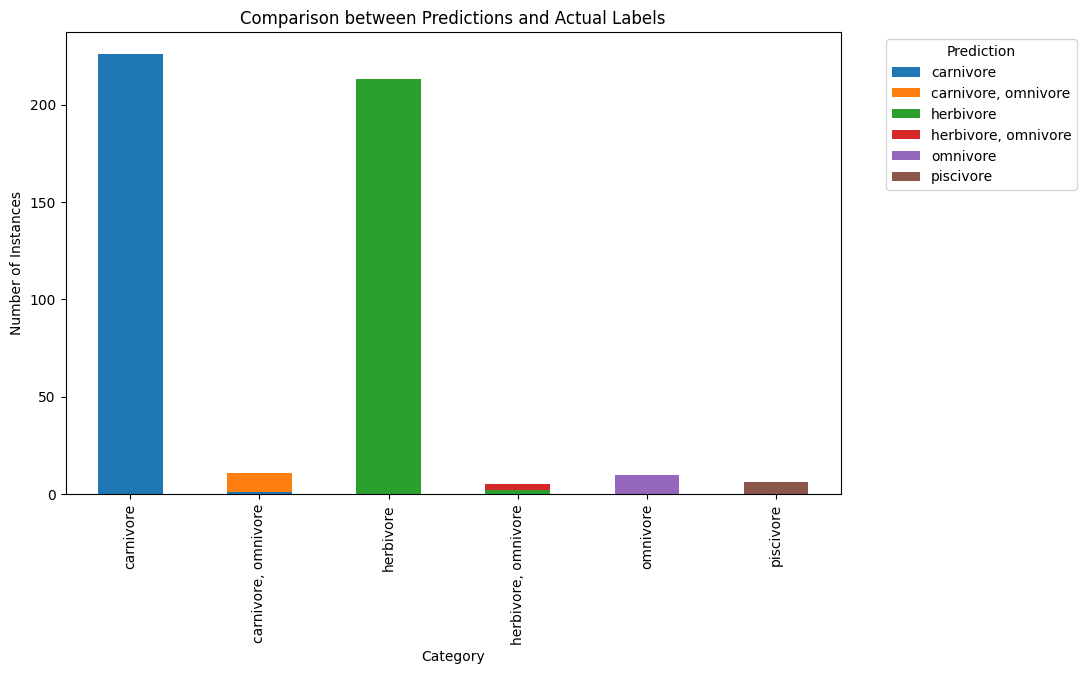

In [ ]:
# Create a DataFrame with the actual labels and predictions
results_df = pd.DataFrame({'Actual': y_test, 'Prediction': predictions})

# Count the occurrences of each class
count_df = results_df.groupby(['Actual', 'Prediction']).size().unstack(fill_value=0)

# Visualize comparisons using a bar chart
count_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.title('Comparison between Predictions and Actual Labels')
plt.legend(title='Prediction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()